In [2]:
pip install tensorflow.io


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 12.7 MB/s eta 0:00:00


In [3]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

In [39]:
wale = os.path.join('data', '5601601O.wav')
not_wale = os.path.join('data', '81015005.wav')
test = os.path.join('data', '5601700F.wav')

In [40]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [8]:
file_contents = tf.io.read_file(wale)

In [ ]:
file_contents

In [14]:
!apt-get install -y ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [16]:
file_contents = tf.io.read_file(wale)

In [25]:
import numpy as np

In [29]:
file_contents = tf.io.read_file(test)

In [30]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [31]:
wave = load_wav_16k_mono(test)

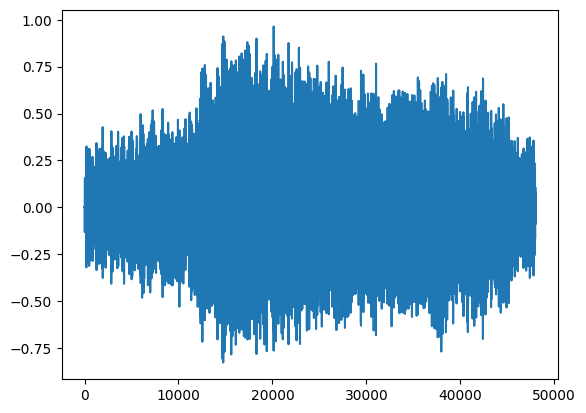

In [32]:
plt.plot(wave)

In [33]:
plt.show()

In [34]:
pip install scipy

In [35]:
file_contents = tf.io.read_file(wale)
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

InvalidArgumentError: {{function_node __wrapped__DecodeWav_device_/job:localhost/replica:0/task:0/device:CPU:0}} Bad audio format for WAV: Expected 1 (PCM), but got3 [Op:DecodeWav] name: 

In [36]:
import scipy.io.wavfile

sample_rate, wave_data = scipy.io.wavfile.read(wale)

print(f"Sample rate: {sample_rate}")
print(f"Wave data: {wave_data}")

Sample rate: 22050
Wave data: [ 0.04277441  0.04831963  0.04531022 ... -0.10561752 -0.07254492
  0.        ]


In [37]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    sample_rate, wav = scipy.io.wavfile.read(wale)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [41]:
wave = load_wav_16k_mono(test)

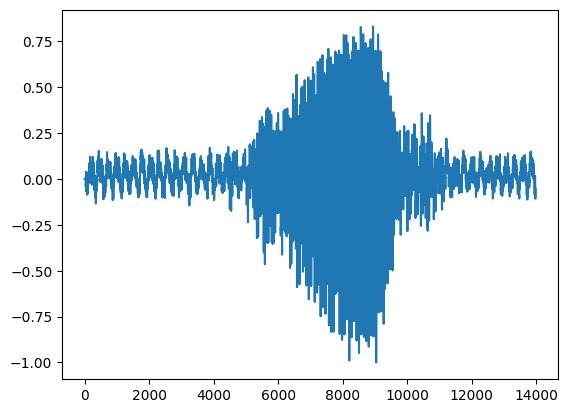

In [42]:
plt.plot(wave)
plt.show()

In [43]:
file_contents = tf.io.read_file(test)
# Decode wav (tensors by channels)
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [44]:
wav

<tf.Tensor: shape=(19260, 1), dtype=float32, numpy=
array([[ 8.9721680e-03],
       [ 1.0070801e-03],
       [-1.1840820e-02],
       ...,
       [-2.6519775e-02],
       [-1.2207031e-02],
       [-9.1552734e-05]], dtype=float32)>